# Recherche d'une corrélation entre une courbe de consommation et une courbe de douleur à l'aide du coefficient de Spearman

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
Food_high_risk_priority=[]

n_lfm=30
for i in range (0,n_lfm):
    Food_high_risk_priority.append('LFM'+str(i))
n_ml=20
for i in range (0,n_ml):
    Food_high_risk_priority.append('LFM'+str(i))

print(Food_high_risk_priority)

['LFM0', 'LFM1', 'LFM2', 'LFM3', 'LFM4', 'LFM5', 'LFM6', 'LFM7', 'LFM8', 'LFM9', 'LFM10', 'LFM11', 'LFM12', 'LFM13', 'LFM14', 'LFM15', 'LFM16', 'LFM17', 'LFM18', 'LFM19', 'LFM20', 'LFM21', 'LFM22', 'LFM23', 'LFM24', 'LFM25', 'LFM26', 'LFM27', 'LFM28', 'LFM29', 'LFM0', 'LFM1', 'LFM2', 'LFM3', 'LFM4', 'LFM5', 'LFM6', 'LFM7', 'LFM8', 'LFM9', 'LFM10', 'LFM11', 'LFM12', 'LFM13', 'LFM14', 'LFM15', 'LFM16', 'LFM17', 'LFM18', 'LFM19']


In [4]:
# données test 
viande_rouge = np.array([150,200,250,300,300,200,200,150,100,0])
douleur = np.array([6,4,5,6,7,8,5,4,2,1])

In [5]:
# recherche d'une corrélation instantannée 

# données test 
viande_rouge_0 = viande_rouge
douleur_0 = douleur

# data frame
df = pd.DataFrame({
    'Consommation_viande (g/jour)' : viande_rouge_0,
    'Douleur' : douleur_0})

# nettoyer les données
df_clean = df.dropna() # supprime les lignes contenant des valeurs manquantes

# calcul de la corrélation de spearman
correlation_spearman = df_clean['Consommation_viande (g/jour)'].corr(df_clean['Douleur'], method='spearman')
print('Corrélation instantannée de Spearman :', correlation_spearman)


Corrélation instantannée de Spearman : 0.6947343909029214


In [6]:
# recherche d'une corrélation à J+1

# données test 
viande_rouge_1 = viande_rouge[0:8]
douleur_1 = douleur[1:9]

# data frame
df = pd.DataFrame({
    'Consommation_viande (g/jour)' : viande_rouge_1,
    'Douleur' : douleur_1})

# nettoyer les données
df_clean = df.dropna() # supprime les lignes contenant des valeurs manquantes

# calcul de la corrélation de spearman
correlation_spearman = df_clean['Consommation_viande (g/jour)'].corr(df_clean['Douleur'], method='spearman')
print('Corrélation instantannée de Spearman :', correlation_spearman)


Corrélation instantannée de Spearman : 0.9440450601916708


In [5]:
# recherche d'une corrélation à J+2

# données test 
viande_rouge_2 = viande_rouge[0:7]
douleur_2 = douleur[2:9]

# data frame
df = pd.DataFrame({
    'Consommation_viande (g/jour)' : viande_rouge_2,
    'Douleur' : douleur_2})

# nettoyer les données
df_clean = df.dropna() # supprime les lignes contenant des valeurs manquantes

# calcul de la corrélation de spearman
correlation_spearman = df_clean['Consommation_viande (g/jour)'].corr(df_clean['Douleur'], method='spearman')
print('Corrélation instantannée de Spearman :', correlation_spearman)


Corrélation instantannée de Spearman : 0.5192377520339356


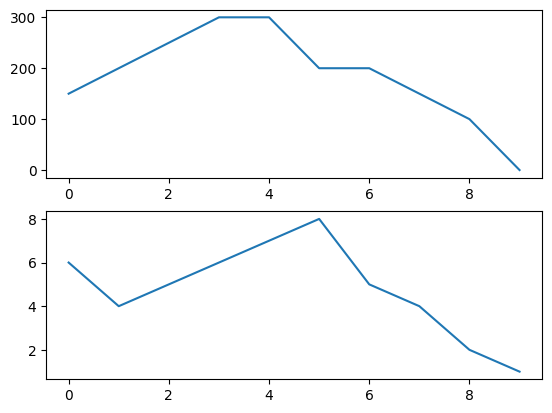

In [18]:
jours=[i for i in range (len(douleur))]
plt.subplot(2,1,1)
plt.plot(jours,viande_rouge)
plt.subplot(2,1,2)
plt.plot(jours,douleur)
plt.show()

In [7]:
import pandas as pd
import numpy as np
from scipy.stats import pearsonr
import matplotlib.pyplot as plt

# Exemple de données : consommation d'un aliment (en grammes) et douleur (sur une échelle de 0 à 10)
data = {
    'jours': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
    'consommation': [50, 100, 150, 200, 250, 300, 350, 400, 450, 500],
    'douleur': [0, 1, 2, 3, 4, 5, 4, 3, 2, 1]  # Simulons une douleur qui augmente puis diminue
}

# Créer un DataFrame
df = pd.DataFrame(data)

# Décaler la douleur pour prendre en compte un potentiel délai de 1 jour
df['douleur_décalée1'] = df['douleur'].shift(1)  # Décalage de 1 jour

# Décaler la douleur pour prendre en compte un potentiel délai de 2 jours
df['douleur_décalée2'] = df['douleur'].shift(2)  # Décalage de 2 jours

# Décaler la douleur pour prendre en compte un potentiel délai de 3 jours
df['douleur_décalée3'] = df['douleur'].shift(3)  # Décalage de 3 jours

# Suppression des valeurs NaN générées par le décalage
df = df.dropna()

print(df)

# Calculer le coefficient de corrélation de Pearson
r, p_value = pearsonr(df['consommation'], df['douleur'])

print(f"Coefficient de corrélation (r) : {r:.2f}")
print(f"Valeur p : {p_value:.4f}")

# Calculer le coefficient de corrélation de Pearson
r, p_value = pearsonr(df['consommation'], df['douleur_décalée1'])

print(f"Coefficient de corrélation (r) : {r:.2f}")
print(f"Valeur p : {p_value:.4f}")

# Calculer le coefficient de corrélation de Pearson
r, p_value = pearsonr(df['consommation'], df['douleur_décalée2'])

print(f"Coefficient de corrélation (r) : {r:.2f}")
print(f"Valeur p : {p_value:.4f}")

# Calculer le coefficient de corrélation de Pearson
r, p_value = pearsonr(df['consommation'], df['douleur_décalée3'])

print(f"Coefficient de corrélation (r) : {r:.2f}")
print(f"Valeur p : {p_value:.4f}")

# Visualisation
#plt.figure(figsize=(10, 5))
#plt.plot(df['jours'], df['consommation'], label='Consommation (g)', marker='o')
#plt.plot(df['jours'], df['douleur_décalée'], label='Douleur (décalée)', marker='o')
#plt.title('Consommation d\'aliment et douleur (décalée)')
#plt.xlabel('Jours')
#plt.ylabel('Valeurs')
#plt.legend()
#plt.grid()
#plt.show()


   jours  consommation  douleur  douleur_décalée1  douleur_décalée2  \
3      3           200        3               2.0               1.0   
4      4           250        4               3.0               2.0   
5      5           300        5               4.0               3.0   
6      6           350        4               5.0               4.0   
7      7           400        3               4.0               5.0   
8      8           450        2               3.0               4.0   
9      9           500        1               2.0               3.0   

   douleur_décalée3  
3               0.0  
4               1.0  
5               2.0  
6               3.0  
7               4.0  
8               5.0  
9               4.0  
Coefficient de corrélation (r) : -0.69
Valeur p : 0.0874
Coefficient de corrélation (r) : 0.00
Valeur p : 1.0000
Coefficient de corrélation (r) : 0.69
Valeur p : 0.0874
Coefficient de corrélation (r) : 0.94
Valeur p : 0.0014
